In [17]:
import numpy as np

total_time = 30 # seconds
overhead_fraction = 0.3
circuit_execs = np.arange(20, 500, 1)
batch_sizes = [5, 10, 15, 20]
overhead_fractions = [0.1, 0.3, 0.5, 0.7, 1]

def pso_time(total_time, overhead_fraction, batch_size, circuit_execs):
    total = 0
    
    for _ in range(int(circuit_execs/batch_size)):
        total += total_time # first one has full overhead

        for _ in range(batch_size-1):
            total += total_time - (total_time * overhead_fraction)
    
    # remainder circuits
    if circuit_execs%batch_size != 0:
        total += total_time # first one has full overhead

        for _ in range(circuit_execs%batch_size - 1):
            total += total_time - (total_time * overhead_fraction)
        
    return total

import matplotlib.pyplot as plt

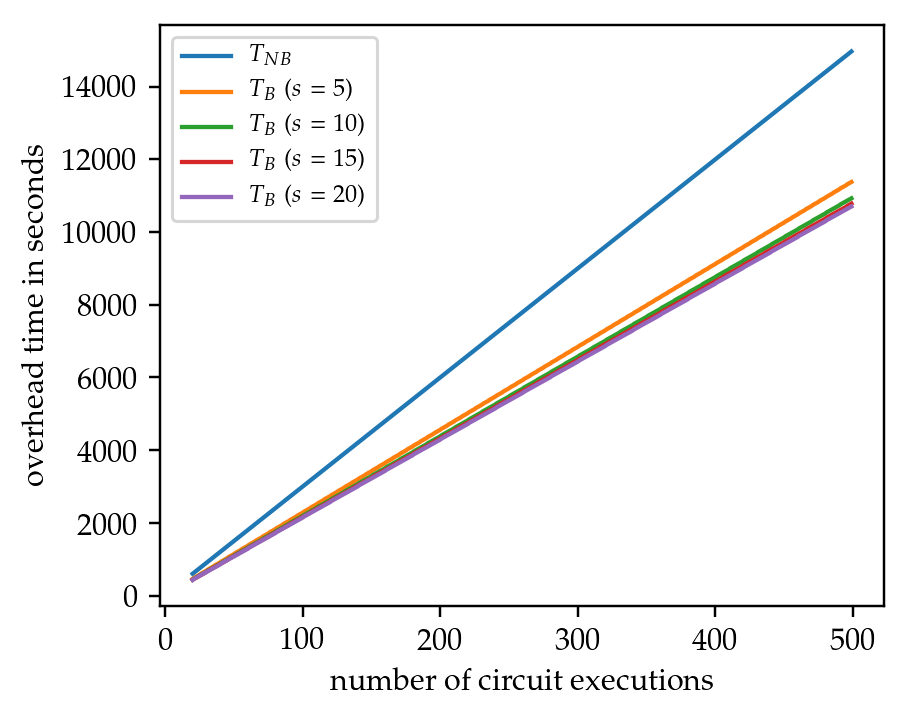

In [29]:
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'''
\usepackage{palatino}
\usepackage{newpxmath}''')
plt.rc('font', family='serif')

fig, ax = plt.subplots(figsize=(4.25, 3.5), dpi=220)

ax.plot(circuit_execs, [x*total_time for x in circuit_execs], label=r"$T_{NB}$", linewidth=1.4)

for batch_size in batch_sizes:
    y = []
    for x in circuit_execs:
        y.append(pso_time(total_time, overhead_fraction, batch_size, x))
    
    label = f"$T_B$ ($s = {batch_size}$)"
    ax.plot(circuit_execs, y, label=label, linewidth=1.4)

plt.ylabel('overhead time in seconds')
plt.xlabel('number of circuit executions')
plt.legend(fontsize=8)
plt.savefig('figures/pso_batch_times_batch_sizes.pdf', bbox_inches='tight')
plt.show()

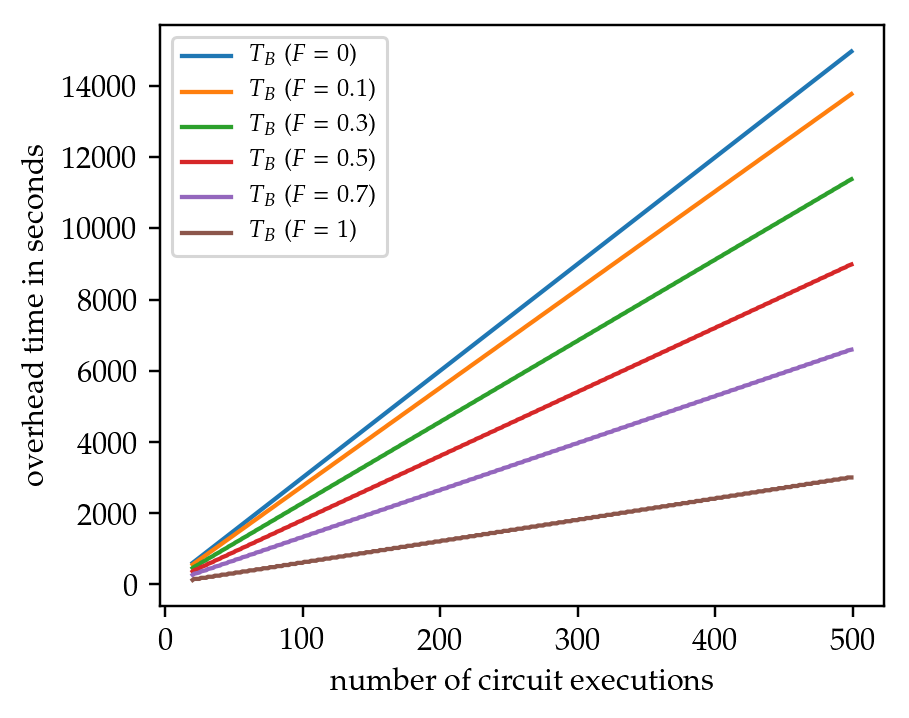

In [24]:
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'''
\usepackage{palatino}
\usepackage{newpxmath}''')
plt.rc('font', family='serif')

fig, ax = plt.subplots(figsize=(4.25, 3.5), dpi=220)

ax.plot(circuit_execs, [x*total_time for x in circuit_execs], label=r"$T_B$ ($F = 0$)", linewidth=1.4)

for fraction in overhead_fractions:
    y = []
    for x in circuit_execs:
        y.append(pso_time(total_time, fraction, 5, x))
    
    label = f"$T_B$ ($F = {fraction}$)"
    ax.plot(circuit_execs, y, label=label, linewidth=1.4)

plt.ylabel('overhead time in seconds')
plt.xlabel('number of circuit executions')
plt.legend(fontsize=8)
plt.savefig('figures/pso_batch_times_speedup_factor.pdf', bbox_inches='tight')
plt.show()